# Train with PyTorch
This notebook shows how to use fastdup to analyze dataset.

<!--<badge>--><a href="https://colab.research.google.com/github/visual-layer/vl-datasets/blob/dev-places365/notebooks/analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [1]:
import fastdup
fastdup.__version__

'0.915'

In [2]:
work_dir = "report/"
images_dir = "data/train"

fd = fastdup.create(work_dir, images_dir)
fd.run()

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-12 14:00:05 [INFO] Going to loop over dir data/train
2023-04-12 14:00:05 [INFO] Found total 14034 images to run on, 14034 train, 0 test, name list 14034, counter 14034 
2023-04-12 14:00:40 [INFO] Found total 14034 images to run onimated: 0 Minutes 0 Features
Finished histogram 4.280
Finished bucket sort 4.321
2023-04-12 14:00:41 [INFO] 1072) Finished write_index() NN model
2023-04-12 14:00:41 [INFO] Stored nn model index file report/nnf.index
2023-04-12 14:00:42 [INFO] Total time took 36854 ms
2023-04-12 14:00:42 [INFO] Found a total of 45 fully identical images (d>0.990), which are 0.11 %
2023-04-12 14:00:42 [INFO] Found a total of 40 nearly identical images(d>0.980), which are 0.10 %
2023-04-12 14:00:42 [INFO] Found a total of 5769 above threshold images (d>0.900), which are 13.70 %
2023-04-12 14:00:42 [INFO] Found a total of 1403 outlier images         (d<0.050), which are 3.33 %
2023-04-12 14:00:42 [

In [3]:
fd.invalid_instances()

,filename,index,error_code,is_valid


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 191.12it/s]


Stored similarity visual view in  report/galleries/duplicates.html



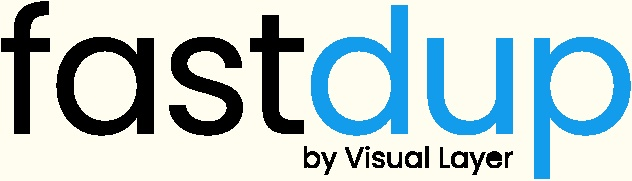
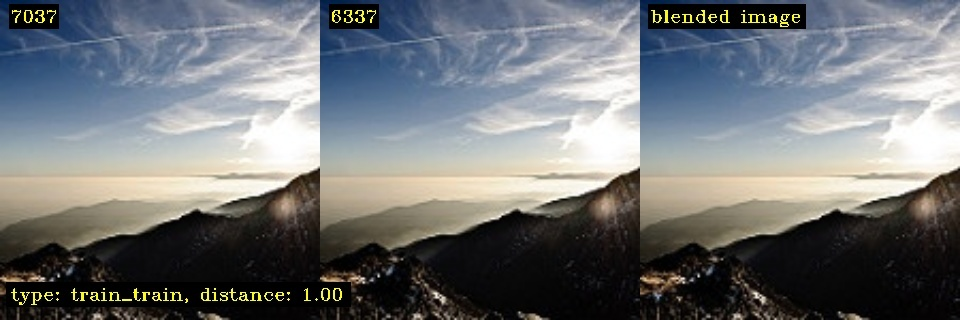
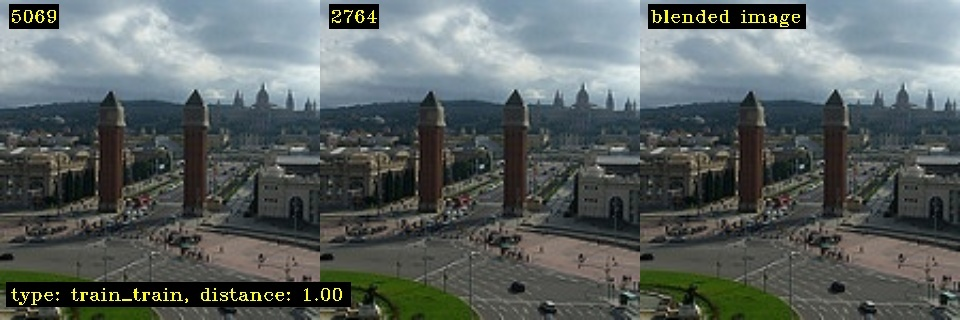
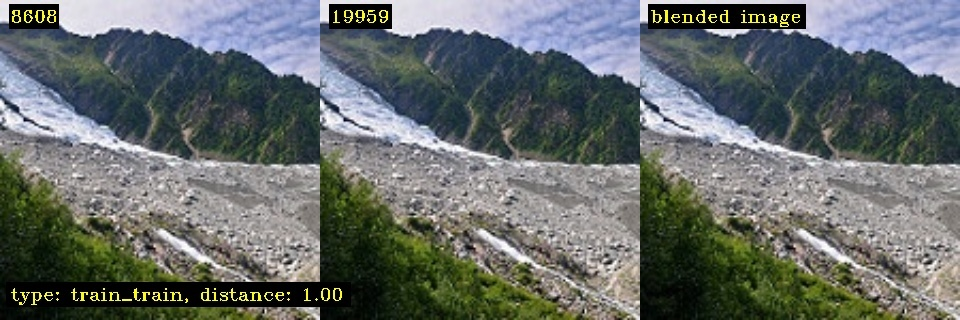
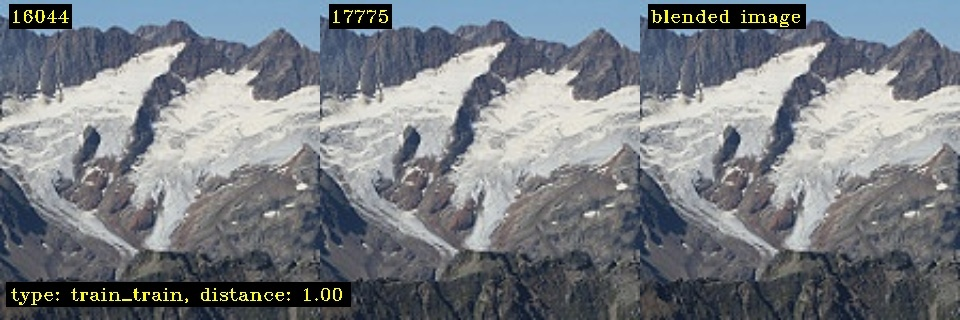
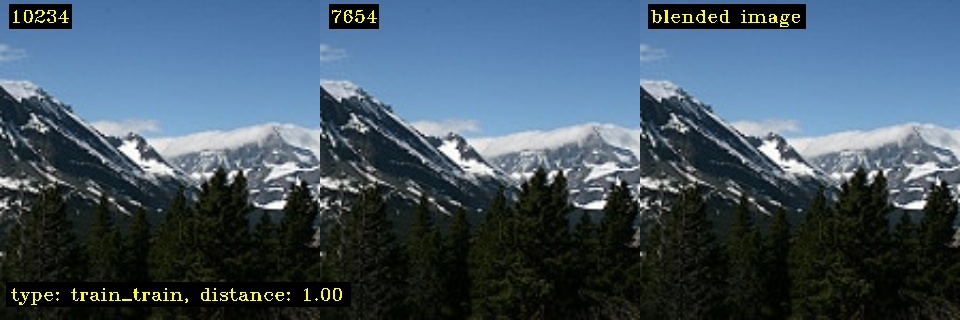
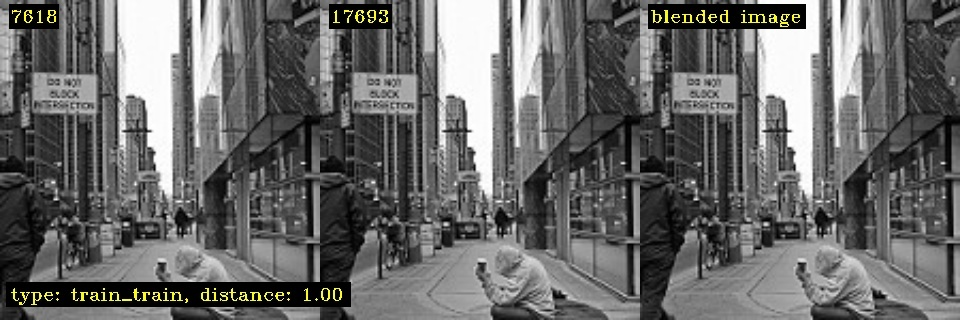
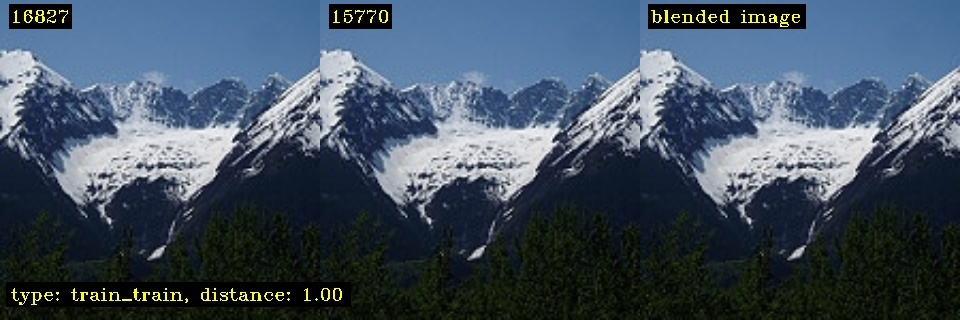
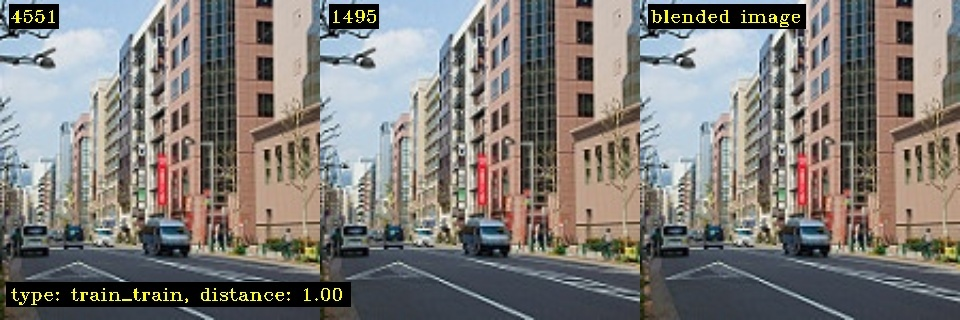
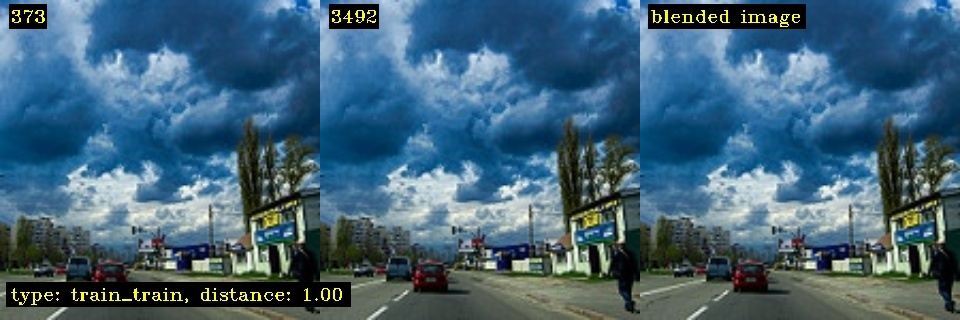
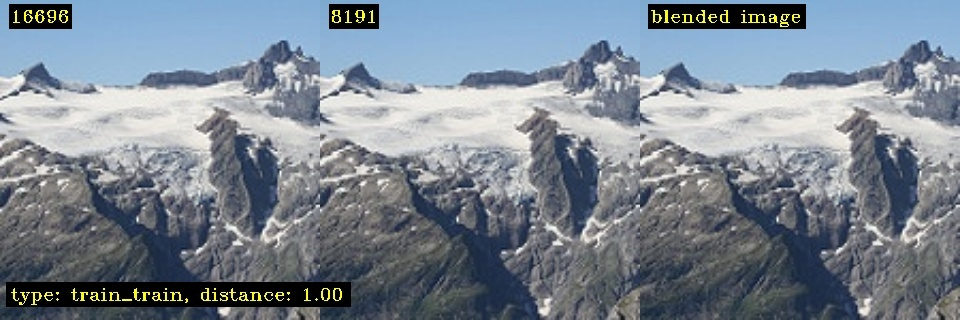
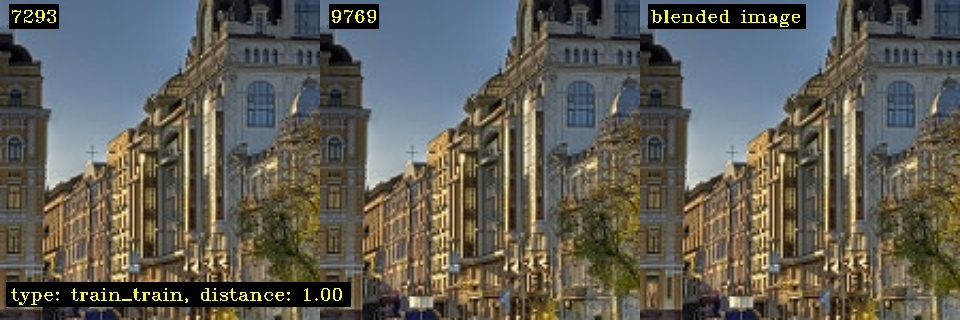
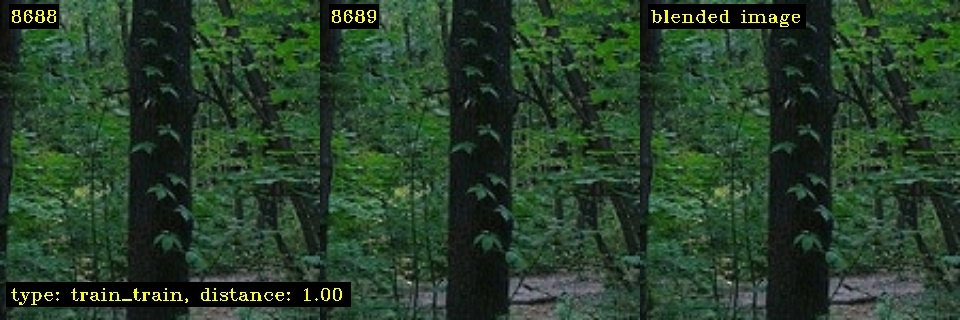
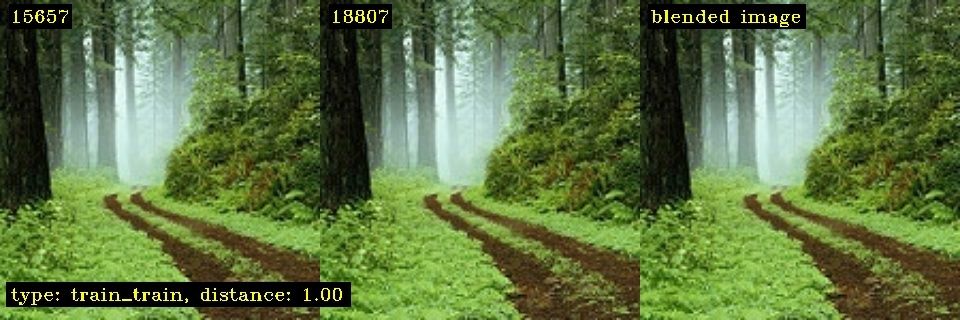
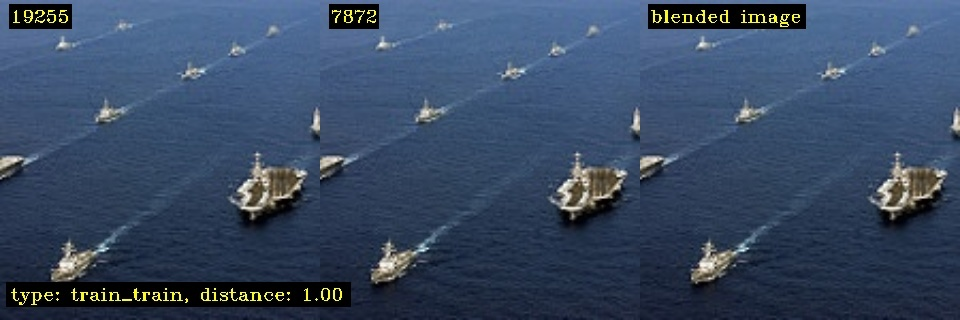
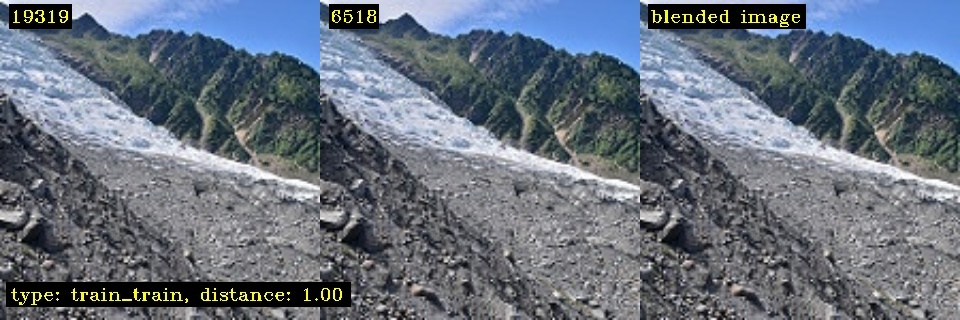
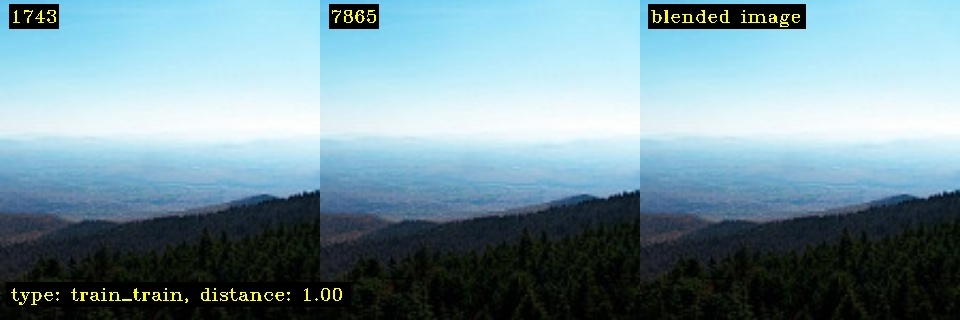
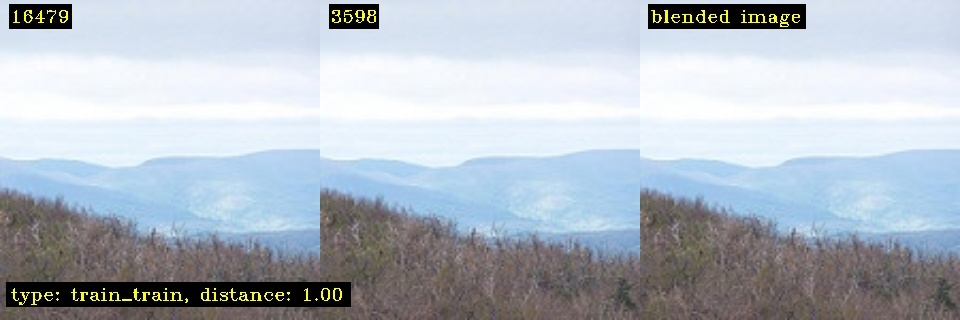
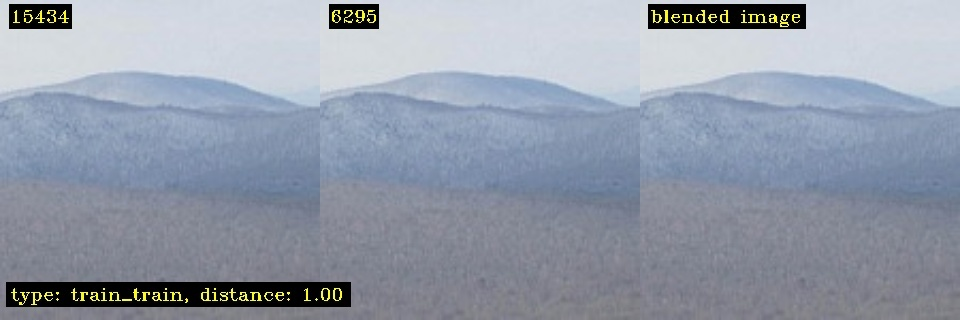

In [4]:
fd.vis.duplicates_gallery()

In [5]:
cc_df, _ = fd.connected_components()

In [7]:
cc_df

,index,component_id,sum,count,mean_distance,min_distance,max_distance,filename,error_code,is_valid
0,0,0,0.0,0.0,0.0,0.0,0.0,data/train/buildings/0.jpg,VALID,True
1,1,1,0.0,0.0,0.0,0.0,0.0,data/train/buildings/10006.jpg,VALID,True
2,2,2,0.0,0.0,0.0,0.0,0.0,data/train/buildings/10014.jpg,VALID,True
3,3,3,0.0,0.0,0.0,0.0,0.0,data/train/buildings/10018.jpg,VALID,True
4,4,4,0.0,0.0,0.0,0.0,0.0,data/train/buildings/1001.jpg,VALID,True
...,...,...,...,...,...,...,...,...,...,...
14029,14029,13918,0.0,0.0,0.0,0.0,0.0,data/train/street/9967.jpg,VALID,True
14030,14030,13919,0.0,0.0,0.0,0.0,0.0,data/train/street/9978.jpg,VALID,True
14031,14031,13920,0.0,0.0,0.0,0.0,0.0,data/train/street/9989.jpg,VALID,True
14032,14032,13921,0.0,0.0,0.0,0.0,0.0,data/train/street/999.jpg,VALID,True


In [9]:
def get_clusters_of_duplicates(df, sort_by='count', min_count=2, ascending=False):
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}
    df = df[df['count'] >= min_count]
    df = df[df["mean_distance"]==1.0]
    grouped_df = df.groupby('component_id').agg(agg_dict).sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

duplicates_df=get_clusters_of_duplicates(cc_df)
duplicates_df

,filename,mean_distance,count
component_id,,,
1555,"[data/train/buildings/4551.jpg, data/train/street/1495.jpg]",1.0,2
1606,"[data/train/buildings/5069.jpg, data/train/street/2764.jpg]",1.0,2
2920,"[data/train/forest/15657.jpg, data/train/forest/18807.jpg]",1.0,2
4251,"[data/train/forest/8688.jpg, data/train/forest/8689.jpg]",1.0,2
4461,"[data/train/glacier/10234.jpg, data/train/mountain/7654.jpg]",1.0,2
5243,"[data/train/glacier/16044.jpg, data/train/mountain/17775.jpg]",1.0,2
5350,"[data/train/glacier/16827.jpg, data/train/mountain/15770.jpg]",1.0,2
5668,"[data/train/glacier/19319.jpg, data/train/mountain/6518.jpg]",1.0,2
6623,"[data/train/glacier/8608.jpg, data/train/mountain/19959.jpg]",1.0,2


In [14]:
def get_list_of_duplicate_images(df):
    df['filename'] = df['filename'].apply(lambda row: row[1:])
    # Get a list of images to delete from the df
    list_of_duplicate_images=duplicates_df['filename'].to_list()
    # Flatten list
    list_of_duplicate_images = [item for sublist in list_of_duplicate_images for item in sublist]
    return list_of_duplicate_images

In [15]:
list_of_duplicate_images = get_list_of_duplicate_images(duplicates_df)
list_of_duplicate_images


['data/train/street/1495.jpg',
 'data/train/street/2764.jpg',
 'data/train/forest/18807.jpg',
 'data/train/forest/8689.jpg',
 'data/train/mountain/7654.jpg',
 'data/train/mountain/17775.jpg',
 'data/train/mountain/15770.jpg',
 'data/train/mountain/6518.jpg',
 'data/train/mountain/19959.jpg',
 'data/train/mountain/7865.jpg',
 'data/train/sea/6337.jpg']

In [17]:
import pandas as pd

df = pd.DataFrame(list_of_duplicate_images, columns=['filename'])
df

,filename
0,data/train/street/1495.jpg
1,data/train/street/2764.jpg
2,data/train/forest/18807.jpg
3,data/train/forest/8689.jpg
4,data/train/mountain/7654.jpg
5,data/train/mountain/17775.jpg
6,data/train/mountain/15770.jpg
7,data/train/mountain/6518.jpg
8,data/train/mountain/19959.jpg
9,data/train/mountain/7865.jpg


In [18]:
df.to_csv("duplicates.csv", index=False)